EXERCISES 


In [4]:
import tensorflow as tf 
mnist=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
mnist

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [11]:
(x_train_full,y_train_full),(x_test,y_test)=mnist
x_train,y_train=x_train_full[:-5000],y_train_full[:-5000]
x_valid,y_valid=x_train_full[-5000:],y_train_full[-5000:]


In [12]:
x_train.shape

(55000, 28, 28)

In [13]:
x_train,x_valid,x_test=x_train/255. , x_valid/255. , x_test/255.

In [14]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")

])


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [18]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7364 - loss: 1.0010 - val_accuracy: 0.9346 - val_loss: 0.2559
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9143 - loss: 0.3080 - val_accuracy: 0.9466 - val_loss: 0.2014
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9297 - loss: 0.2475 - val_accuracy: 0.9556 - val_loss: 0.1723
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9399 - loss: 0.2105 - val_accuracy: 0.9612 - val_loss: 0.1520
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9469 - loss: 0.1832 - val_accuracy: 0.9646 - val_loss: 0.1370
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9533 - loss: 0.1621 - val_accuracy: 0.9668 - val_loss: 0.1254
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9588 - loss: 0.1450 - val_accuracy: 0.9684 - val_loss: 0.1164
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9630 - loss: 0.1308 -

train accuracy-99.43% and validaton accuracy-98.04% 
Overfitting ho rahi hai bhayankar

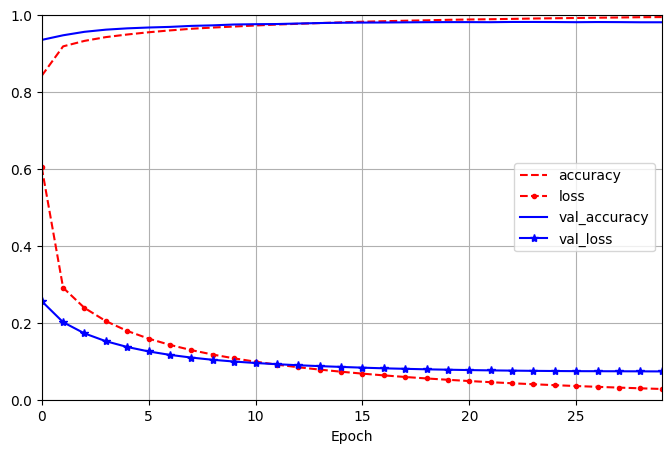

In [19]:
import matplotlib.pyplot as plt 
import pandas as pd 
pd.DataFrame(history.history).plot(
  figsize=(8,5), xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--","r--.","b-","b-*"])
plt.show()

In [20]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.0795


[0.06847288459539413, 0.9786999821662903]

In [62]:
test=pd.read_csv("test.csv")


In [63]:
test=test
test=test.to_numpy()

In [64]:
test=test.reshape(-1,28,28)
test.shape

(28000, 28, 28)

In [65]:
y_proba=model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [66]:
import numpy as np 

ypred = y_proba.argmax(axis=-1)

# Create a DataFrame where ImageId is the index (starting from 1) and Label is the prediction
df = pd.DataFrame({
    "ImageId": np.arange(1, len(ypred) + 1),  # ImageId starts from 1
    "Label": ypred
})

print(df)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [67]:
df.to_csv("sub.csv",index=False)